In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [112]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Suicide\master.csv')

In [113]:
#data processing
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [114]:
df.index

RangeIndex(start=0, stop=27820, step=1)

In [115]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [116]:
df.fillna('HDI for year', inplace = True)

In [117]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [118]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,HDI for year,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,HDI for year,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,HDI for year,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,HDI for year,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,HDI for year,"2,156,624,900",796,Boomers


In [119]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [120]:
df = df.drop(['country-year','HDI for year'], axis = 1)

In [121]:
df.isnull().sum()
df.head()
df = df.sample(n=100)

In [122]:
#to set in independent and depentdent variable
x = df.iloc[0:100,[4]]
y = df.iloc[0:100,[5,6]]

In [123]:
x,y

(       suicides_no
 20599          256
 18608            1
 20377         1656
 14193            3
 27032         3424
 20473         3109
 22087            0
 10225            1
 21812            1
 5329            19
 5355            27
 14675           26
 4759             3
 13695         2242
 2346             1
 5290           147
 25227          100
 7868            37
 7433           204
 21352            0
 22714           12
 15722            0
 15117          322
 7349           424
 20586          453
 18299            0
 8445            19
 23633           53
 18271            4
 3038             0
 ...            ...
 18915          167
 22884           61
 456              1
 1636           103
 10720           45
 21871            0
 15327            0
 2208            20
 15069          294
 1988             1
 8115           171
 9548            10
 16775          119
 12280           15
 2934             0
 21715            0
 14832           58
 16614          404


In [124]:
#to split train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 3)

In [125]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [126]:
#creating regression object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

In [128]:
print('coefficient',regr.coef_)
print('intercept',regr.intercept_)

coefficient [[3.23822596e+03]
 [5.45933121e-03]]
intercept [9.81265486e+05 1.19807442e+01]


In [131]:
# The mean squared error
# MSE = 1/n(yactual- ypredicted)2
print("MSE: %.2f"
      % mean_squared_error(y_test,y_pred))

MSE: 4238299481895.67


In [130]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))
r2_score(y_test,y_pred)

Variance score: 0.27


0.2689839918660396

ValueError: color kwarg must have one color per data set. 25 data sets and 1 colors were provided

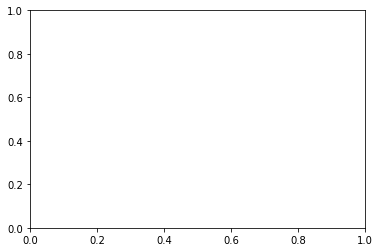

In [134]:
#Plot outputs
plt.hist(y_test, color='Red')
plt.hist(y_pred, olor='Red')

Text(0.5, 1.0, 'Residual Plot')

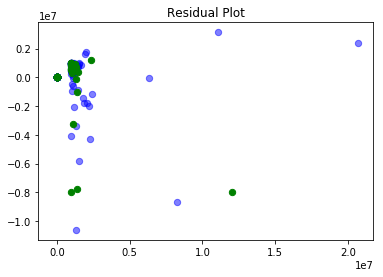

In [136]:
plt.scatter(regr.predict(x_train),regr.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(regr.predict(x_test), regr.predict(x_test)-y_test, c='g', s=40)
plt.hlines(y= 0, xmin = 0, xmax= 50)
plt.title('Residual Plot')